**KELOMPOK PANDAS LOVERS**
<br>Ketua : Sendhy Boedhi
<br>Anggota :
1. Edgar Ariel Majied
2. Vionella Awanda Irsabadi
3. Teguh Ferdianto
4. R. Arnanda Adi Wijanarko
5. Faris Isham Wiryansyah
6. Jodhi Krisantus Sihalbu
7. Jannisah Dwi Rahhadiski

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/JodhiKrisantus/DATASET/main/flight.csv')

# EDA

## Invalid Data Type, Duplicated Data, and Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
df.duplicated().sum()

0

In [ ]:
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv],axis=1)
mdf.columns = ['Missing Value Total', 'Missing Value Percentage (%)']
mdf.sort_values(by='Missing Value Percentage (%)', ascending=False)

,Missing Value Total,Missing Value Percentage (%)
WORK_PROVINCE,3248,5.156538
WORK_CITY,2269,3.602273
SUM_YR_1,551,0.874770
AGE,420,0.666794
SUM_YR_2,138,0.219089
WORK_COUNTRY,26,0.041278
GENDER,3,0.004763
MEMBER_NO,0,0.000000
LAST_FLIGHT_DATE,0,0.000000
Points_Sum,0,0.000000


**HASIL PENGAMATAN:**
- Kolom `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, dan `LAST_FLIGHT_DATE` (4 kolom) bertipe data object akan diubah ke datetime.
- Tidak ada data duplikat.
- Terdapat 7 kolom yang terdapat missing value yaitu: `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`, dan `SUM_YR_2`.
- Ketujuh kolom tersebut memiliki persentase missing value < 10%, sehingga akan didrop saat melakukan data pre-processing.


## Describe Numerical Features

In [ ]:
colm = df.select_dtypes(include=['number'])
nums = colm.columns.tolist()
colm.sample(5)

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23962,25334,4,31.0,12,6731,2275.0,7253.0,14827,16,40.272727,157,0,0.677221,6731,0
20818,7137,4,29.0,11,9286,512.0,10403.0,16862,29,43.600000,166,0,0.697253,9286,0
46134,56778,4,40.0,7,2877,2009.0,1410.0,7824,130,60.000000,198,0,0.436581,13877,2
40245,32919,4,28.0,6,3230,1970.0,2619.0,7004,190,84.600000,242,0,0.656581,3230,0
61448,55998,4,38.0,2,808,903.0,0.0,2078,429,3.000000,3,0,0.475000,808,0


In [ ]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


**HASIL PENGAMATAN:**
- Terdapat 15 kolom numerik.
- Semua kolom distribusinya right skewed (mean > median), kecuali kolom `MEMBER_NO`.
- Hampir semua kolom memiliki nilai maksimum yang sangat jauh dengan nilai minimum dan mediannya, kecuali kolom `FFP_TIER` dan `avg_discount`. Hal ini mengindikasikan bahwa value-nya sangat beragam dan range datanya sangat luas.

## Describe Categorical Features

In [ ]:
cols = df.select_dtypes(exclude=['number', 'datetime'])
cats = cols.columns.tolist()
cols.sample(5)

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
31570,7/29/2005,1/23/2008,Male,shenzhen,guangdong,CN,3/31/2014,11/27/2013
56747,6/2/2005,9/10/2005,Male,guangzhou,guangdong,CN,3/31/2014,8/21/2013
5218,12/4/2008,12/4/2008,Male,shanghai,shanghai,CN,3/31/2014,7/10/2013
61584,3/17/2011,3/17/2011,Female,guangzhou,guangdong,CN,3/31/2014,12/10/2012
13294,2/8/2010,2/8/2010,Male,guangzhou,guangdong,CN,3/31/2014,3/14/2014


In [ ]:
df[cats].describe().T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


**HASIL PENGAMATAN:**
- Terdapat 8 kolom kategorikal.
- Semua kolom memiliki jumlah unique value yang sangat banyak, kecuali kolom `GENDER` dan `LOAD_TIME`.
- Kolom `LOAD_TIME` hanya memiliki 1 unique value. Artinya, kolom ini bisa didrop saja karena tidak digunakan dalam pemodelan.
- Terdapat ketimpangan pada kolom `GENDER`. Value ‘Male’ memiliki jumlah data lebih dari 70%.


## Unique Values

In [ ]:
for i in cats:
    total = df[i].nunique()
    print(f'unique value kolom {i}:', 'total:', total)
    print(f'{df[i].unique()}\n')

unique value kolom FFP_DATE: total: 3068
['11/2/2006' '2/19/2007' '2/1/2007' ... '5/3/2009' '1/25/2010' '5/19/2009']

unique value kolom FIRST_FLIGHT_DATE: total: 3406
['12/24/2008' '8/3/2007' '8/30/2007' ... '3/30/2014' '3/25/2014'
 '3/24/2014']

unique value kolom GENDER: total: 2
['Male' 'Female' nan]

unique value kolom WORK_CITY: total: 3234
['.' nan 'Los Angeles' ... 'BELLREGUARD' 'Danville' 'lingshui']

unique value kolom WORK_PROVINCE: total: 1165
['beijing' 'CA' 'guizhou' ... 'NOTARIO' 'TOPKPPI' 'JAWATIMUR']

unique value kolom WORK_COUNTRY: total: 118
['CN' 'US' 'FR' 'AN' 'JP' 'HK' 'MY' 'AU' 'NL' 'MX' 'CA' 'KR' 'PK' 'TH'
 'SG' 'BR' 'PE' 'AE' 'HN' 'PH' 'ID' 'MO' 'GN' 'FL' 'KH' nan 'TW' 'VN' 'DE'
 'IL' 'CH' 'PA' 'VT' 'EC' 'NG' 'BI' 'GT' 'BE' 'GL' 'NZ' 'FA' 'NI' 'KO'
 'CC' 'UV' 'MN' 'UK' 'AS' 'IT' 'OM' 'SE' 'BZ' 'IN' 'KZ' 'PT' 'NO' 'MS'
 'FI' 'UZ' 'NE' 'AT' 'AA' 'HU' 'CY' 'EG' 'MA' '中' 'ES' 'MZ' 'IR' 'SW' 'RE'
 'PS' 'KE' 'SN' 'BB' 'AZ' 'UA' 'LB' 'YE' 'GE' 'SI' 'KA' 'MV' 'RO' 'ZA

**HASIL PENGAMATAN:**
- Pada kolom `WORK_CITY` dan `WORK_PROVINCE` penulisannya tidak konsisten, karena ada value yang lowercase, uppercase, dan kapital pada huruf pertama. Oleh karena itu, nantinya perlu disamakan.
- Terdapat penulisan dalam bahasa Mandarin pada kolom `WORK_COUNTRY`, seperti 芬, 沈, dan lainnya. Hal ini perlu diperbaiki juga.

## Distribusi Kolom Numerical

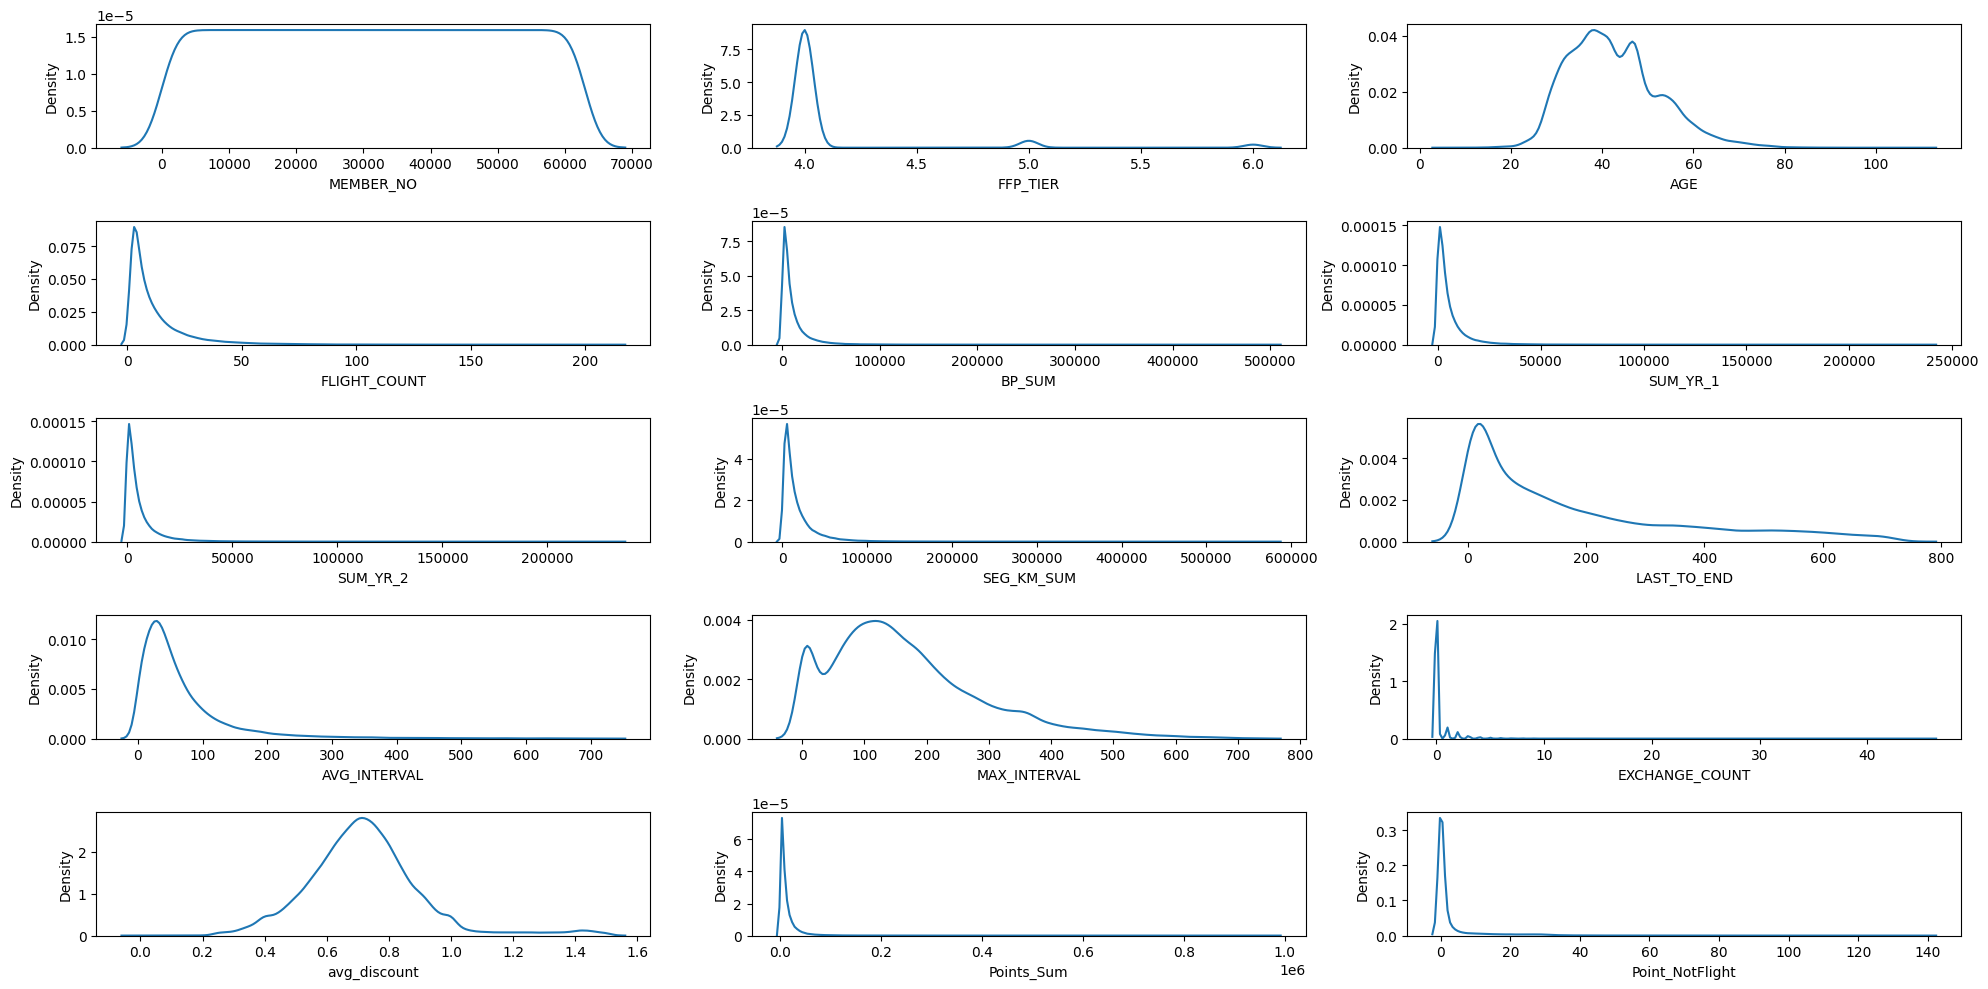

In [ ]:
plt.figure(figsize=(20,10))
for i in range(len(nums)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x = df[nums[i]])
plt.tight_layout()

**HASIL PENGAMATAN:**

Kolom `avg_discount`, `FFP_TIER`, `AGE` memiliki distribusi data yang normal. Selain itu, kolom lainnya memiliki distribusi right skewed.

## Correlation Heatmap

<ipython-input-12-ea51fd6e0279>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

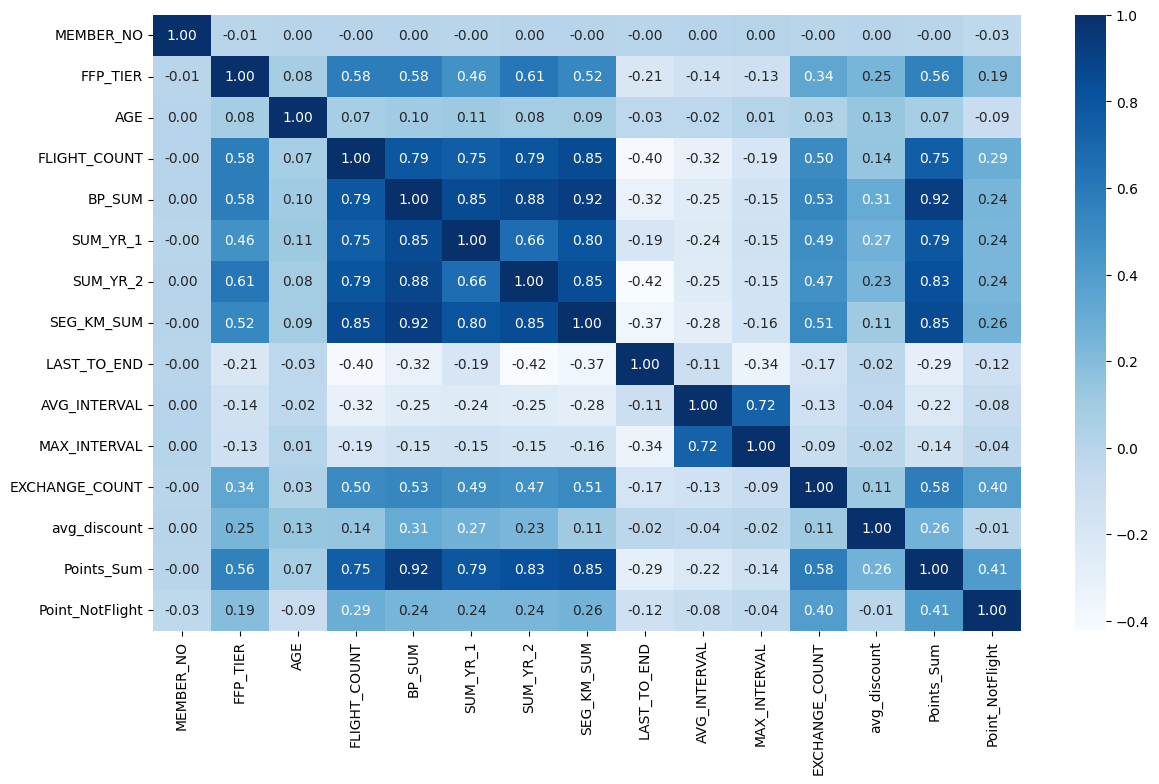

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**HASIL PENGAMATAN:**

Kolom `FLIGHT_COUNT`, `BP_SUM`,  `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM`, dan `Points_Sum` saling memiliki keterkaitan atau korelasi yang cukup tinggi (>= 0,70).

# DATA PRE-PROCESSING

## Feature Selection

Pemilihan 5 fitur di bawah ini adalah untuk melakukan feature engineering dan juga sebagai pengukuran metric RFM (Recency, Frequency, and Monetary).

In [ ]:
df[['LAST_TO_END','FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','FLIGHT_COUNT','SUM_YR_1']].head()

,LAST_TO_END,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,FLIGHT_COUNT,SUM_YR_1
0,1,12/24/2008,3/31/2014,210,239560.0
1,7,8/3/2007,3/25/2014,140,171483.0
2,11,8/30/2007,3/21/2014,135,163618.0
3,97,8/23/2008,12/26/2013,23,116350.0
4,5,4/15/2009,3/27/2014,152,124560.0


## Handling Missing Values
Karena missing values tidak lebih dari 10% dari keseluruhan data, maka kita drop missing values-nya.

In [ ]:
mdf.sort_values(by='Missing Value Percentage (%)', ascending=False)

,Missing Value Total,Missing Value Percentage (%)
WORK_PROVINCE,3248,5.156538
WORK_CITY,2269,3.602273
SUM_YR_1,551,0.874770
AGE,420,0.666794
SUM_YR_2,138,0.219089
WORK_COUNTRY,26,0.041278
GENDER,3,0.004763
MEMBER_NO,0,0.000000
LAST_FLIGHT_DATE,0,0.000000
Points_Sum,0,0.000000


In [ ]:
df = df.dropna(subset=['WORK_COUNTRY','GENDER','SUM_YR_2','AGE','SUM_YR_1','WORK_CITY','WORK_PROVINCE'])

In [ ]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Feature Engineering & Extraction

Membuat 3 fitur baru yaitu:
- `BulanTerbang` dari fitur `FIRST_FLIGHT_DATE` dan `LAST_FLIGHT_DATE`. Fitur ini untuk mengetahui berapa bulan lamanya jarak antara penerbangan pertama dan terakhir pada setiap orang.
- `FlightCount/BulanTerbang` dari fitur `FLIGHT_COUNT` dan `BulanTerbang`. Fitur ini untuk mengetahui rata-rata penerbangan setiap bulannya.
- `FareRevenue/Bulan` dari fitur `SUM_YR_1` dan `BulanTerbang`. Fitur ini untuk mengetahui pengeluaran customer setiap bulannya.

In [ ]:
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
# bulan Februari (2), hanya memiliki 28 hari, sehingga harus diubah menjadi tgl 28
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00','2014/2/28  0:00:00')
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])

df['BulanTerbang'] = (df['LAST_FLIGHT_DATE'].dt.year - df['FIRST_FLIGHT_DATE'].dt.year) * 12 + (df['LAST_FLIGHT_DATE'].dt.month - df['FIRST_FLIGHT_DATE'].dt.month)
df['FlightCount/BulanTerbang'] = df['FLIGHT_COUNT']/df['BulanTerbang']

df['FareRevenue/Bulan'] = df['SUM_YR_1']/df['BulanTerbang']

In [ ]:
df[['FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE','BulanTerbang','FlightCount/BulanTerbang','FareRevenue/Bulan']]

,FIRST_FLIGHT_DATE,LAST_FLIGHT_DATE,BulanTerbang,FlightCount/BulanTerbang,FareRevenue/Bulan
0,2008-12-24,2014-03-31,63,3.333333,3802.539683
2,2007-08-30,2014-03-21,79,1.708861,2071.113924
3,2008-08-23,2013-12-26,64,0.359375,1817.968750
4,2009-04-15,2014-03-27,59,2.576271,2111.186441
5,2009-09-29,2014-01-13,52,1.769231,2160.846154
...,...,...,...,...,...
62982,2013-01-20,2013-01-20,0,inf,NaN
62983,2013-06-05,2013-06-09,0,inf,NaN
62984,2013-09-14,2014-01-03,4,1.000000,0.000000
62985,2006-12-02,2014-03-03,87,0.022989,0.000000


In [ ]:
features = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']
dt = df[features]
dt

,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
0,1,3.333333,3802.539683
2,11,1.708861,2071.113924
3,97,0.359375,1817.968750
4,5,2.576271,2111.186441
5,79,1.769231,2160.846154
...,...,...,...
62982,437,inf,NaN
62983,297,inf,NaN
62984,89,1.000000,0.000000
62985,29,0.022989,0.000000


Ketiga fitur ini akan digunakan untuk mengukur RFM dan selanjutnya untuk pemodelan clustering.
- Recency (R) : `LAST_TO_END`
- Frequency (F) : `FlightCount/BulanTerbang`
- Monetary (M) : `FareRevenue/Bulan`


In [ ]:
dt.isna().sum()

LAST_TO_END                   0
FlightCount/BulanTerbang      0
FareRevenue/Bulan           827
dtype: int64

In [ ]:
dt = dt.dropna(subset='FareRevenue/Bulan')
print(dt.isna().sum())

LAST_TO_END                 0
FlightCount/BulanTerbang    0
FareRevenue/Bulan           0
dtype: int64


In [ ]:
np.isinf(dt).sum()

LAST_TO_END                    0
FlightCount/BulanTerbang    1585
FareRevenue/Bulan           1585
dtype: int64

In [ ]:
dt.dtypes

LAST_TO_END                   int64
FlightCount/BulanTerbang    float64
FareRevenue/Bulan           float64
dtype: object

- Setelah membuat fitur baru `BulanTerbang` ternyata ada beberapa baris yang memiliki nilai null. Nilai null (`BulanTerbang` == 0) ini terjadi ketika range waktu customer kurang dari sebulan.
- Oleh karena itu, terdapat nilai infinite pada fitur `FlightCount/BulanTerbang` dan `FareRevenue/Bulan` yang disebabkan oleh pembaginya (penyebut) adalah fitur `BulanTerbang` yang bernilai null.

Boxplot Sebelum Handling Outlier


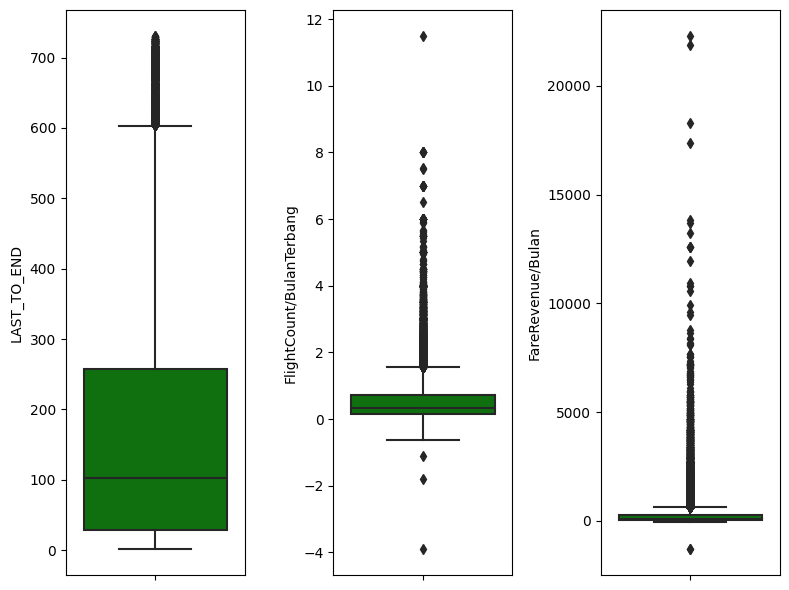

In [ ]:
# Boxplot sebelum handling outliers
features2 = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']

cols = features2

print('Boxplot Sebelum Handling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1,len(cols), i+1)
    sns.boxplot(y=dt[cols[i]],color='green', orient='V')
    plt.tight_layout()

In [ ]:
# metode IQR untuk handling outliers
features2 = ['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']
for i in features2:
    Q1 = dt[i].quantile(0.25)
    Q3 = dt[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5*IQR)
    high_limit = Q3 + (1.5*IQR)
    dt = dt[ (dt[i]>low_limit) & (dt[i]<high_limit) ]

Boxplot Setelah Heandling Outlier


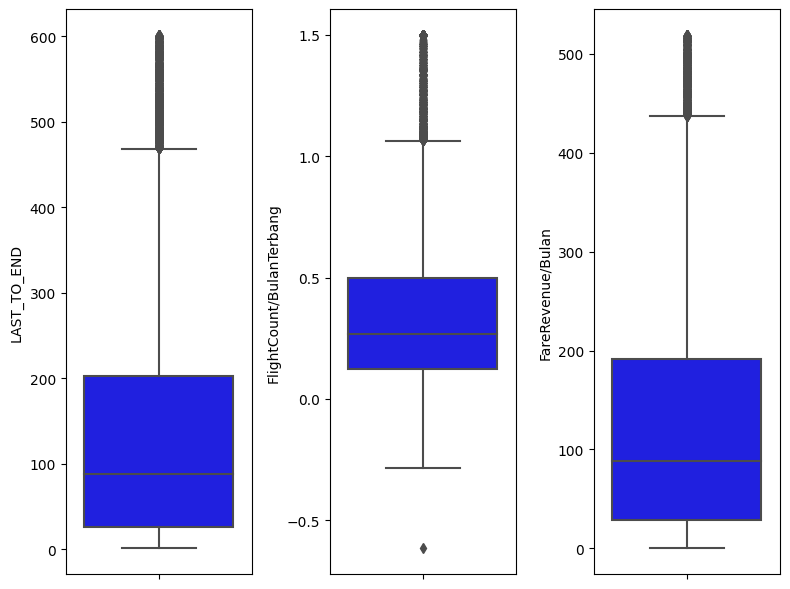

In [ ]:
# Boxplot setelah handling outliers
cols = features2

print('Boxplot Setelah Heandling Outlier')
plt.figure(figsize=(8,6))
for i in range(0, len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.boxplot(y=dt[cols[i]], color='blue', orient='V')
    plt.tight_layout()

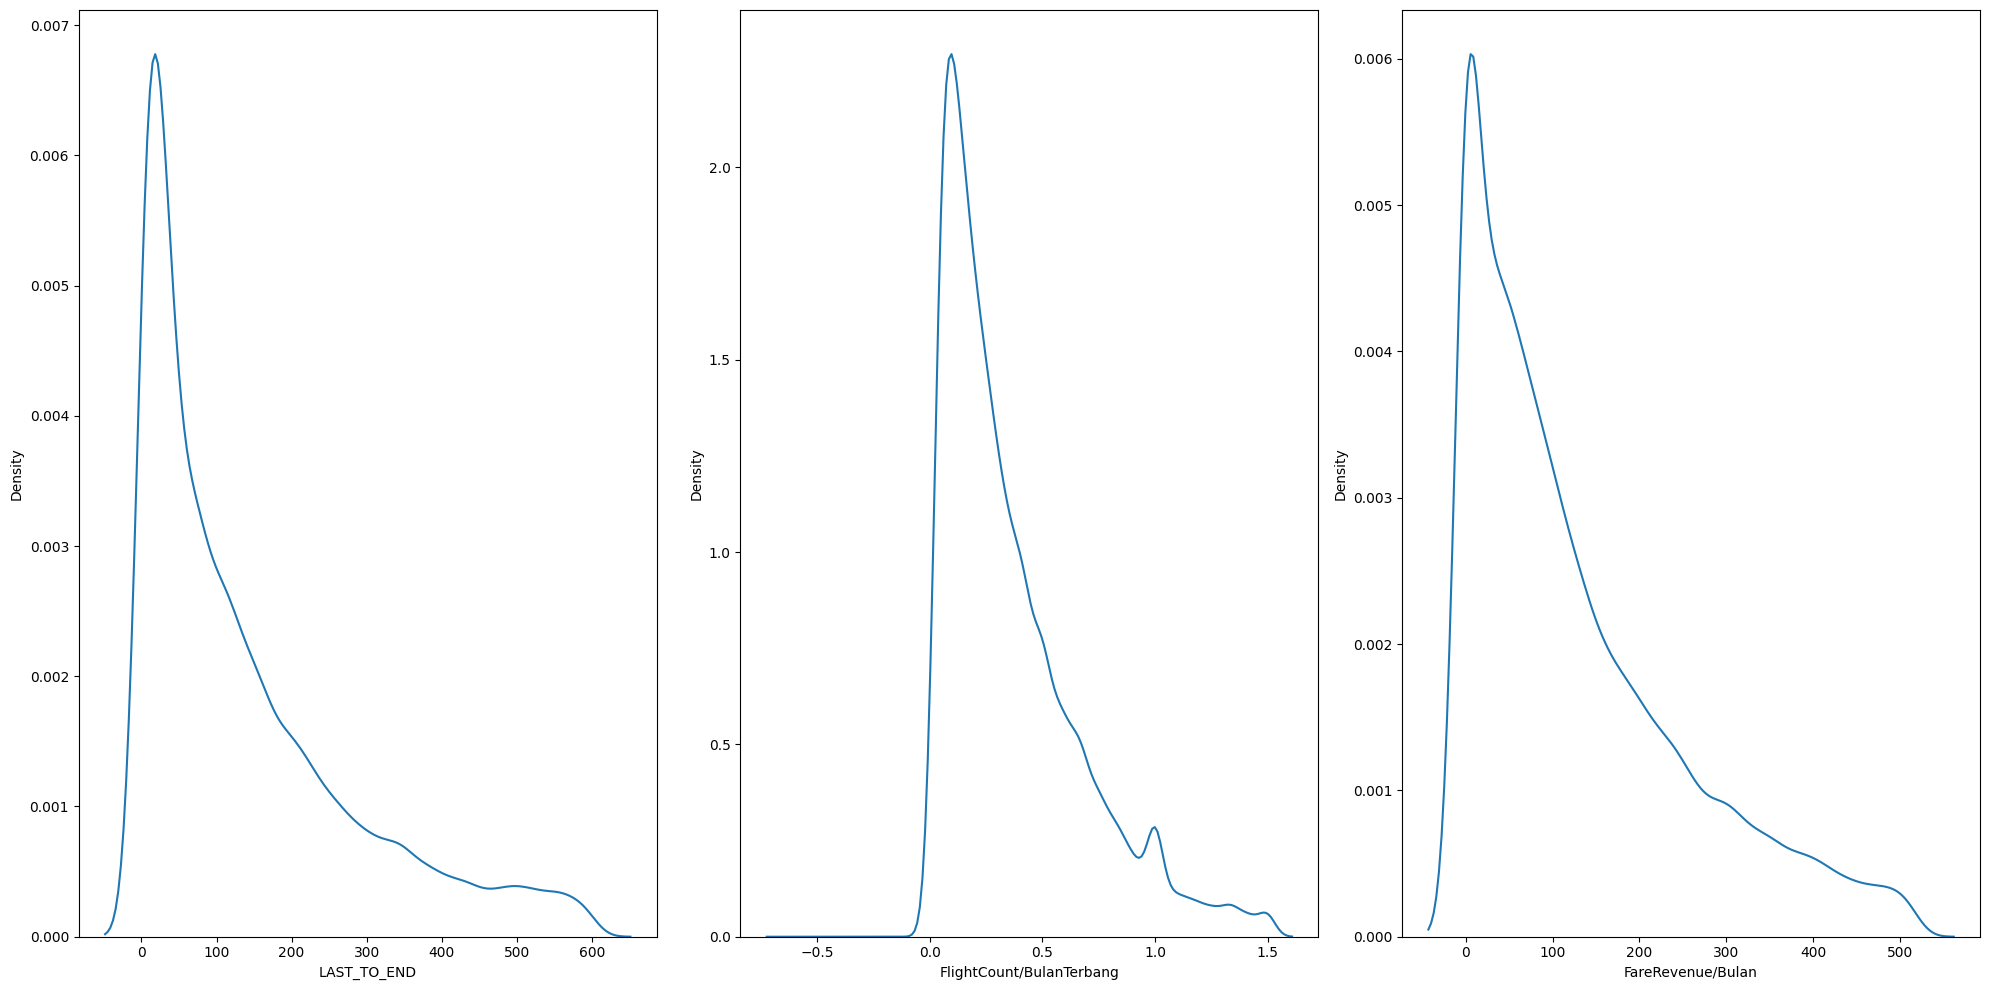

In [ ]:
# Distribusi KDE plotnya setelah handling outliers
plt.figure(figsize=(20,10))
for i in range(len(cols)):
    plt.subplot(1, len(cols), i+1)
    sns.kdeplot(x = dt[cols[i]])
plt.tight_layout()

In [ ]:
# Check Infinit value after remove outlier
np.isinf(dt).sum()

LAST_TO_END                 0
FlightCount/BulanTerbang    0
FareRevenue/Bulan           0
dtype: int64

In [ ]:
data = dt[['LAST_TO_END', 'FlightCount/BulanTerbang','FareRevenue/Bulan']]
print(data.shape)
data.head()

(47394, 3)


,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
58,15,0.518868,500.254717
59,21,0.703704,496.703704
84,9,0.898148,513.555556
120,2,0.942857,504.723810
121,27,0.373832,317.691589


In [ ]:
df_lrfmc = data.copy()
df_lrfmc.columns = ['recency','frequency','monetary']

In [ ]:
df_lrfmc.head()

,recency,frequency,monetary
58,15,0.518868,500.254717
59,21,0.703704,496.703704
84,9,0.898148,513.555556
120,2,0.942857,504.723810
121,27,0.373832,317.691589


In [ ]:
df_lrfmc.describe()

,recency,frequency,monetary
count,47394.000000,47394.000000,47394.000000
mean,137.773600,0.363376,126.354738
std,142.283751,0.308803,123.892347
min,1.000000,-0.615385,0.000000
25%,26.000000,0.125000,28.275792
50%,88.000000,0.268041,88.250000
75%,203.000000,0.500000,191.844697
max,602.000000,1.500000,519.090909


## Feature Transformation

In [ ]:
rfm_log = df_lrfmc.copy()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_std = rfm_log
scale = MinMaxScaler()
kolom_all = ['recency', 'frequency', 'monetary']
for kolom in kolom_all:
    df_std[kolom] = scale.fit_transform(df_std[[kolom]])
df_std.head()

,recency,frequency,monetary
58,0.023295,0.536192,0.963713
59,0.033278,0.623569,0.956872
84,0.013311,0.715488,0.989336
120,0.001664,0.736623,0.972323
121,0.043261,0.467630,0.612015


In [ ]:
df_std.describe()

,recency,frequency,monetary
count,47394.000000,47394.000000,47394.000000
mean,0.227577,0.462687,0.243415
std,0.236745,0.145979,0.238672
min,0.000000,0.000000,0.000000
25%,0.041597,0.350000,0.054472
50%,0.144759,0.417619,0.170009
75%,0.336106,0.527273,0.369578
max,1.000000,1.000000,1.000000


# MODELING & EVALUATION

## Modeling

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

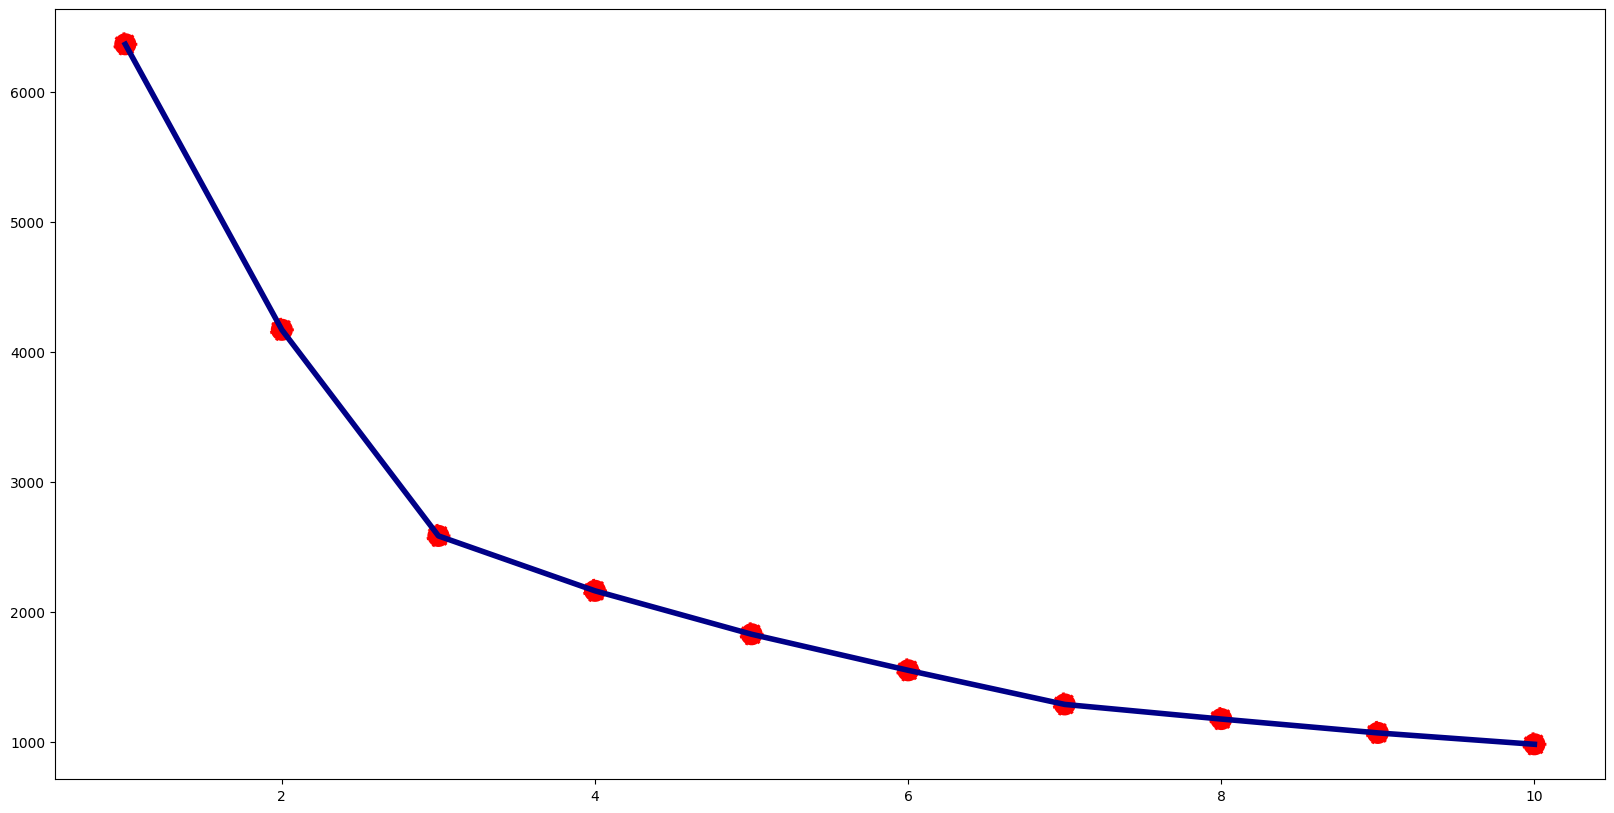

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11):
    k_m= KMeans(n_clusters=i, random_state=142)
    k_m.fit(df_std)
    inertia.append(k_m.inertia_)
plt.figure(figsize=(20,10))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='Red', linestyle='--')

In [ ]:
k_m = KMeans(n_clusters=3, random_state=1).fit(df_std)

df_data_std= pd.DataFrame(data=df_std, columns=list(data))

df_data_std['clusters']= k_m.labels_
data['clusters']= k_m.labels_
print(data.shape)
data.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(47394, 4)


,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan,clusters
58,15,0.518868,500.254717,0
59,21,0.703704,496.703704,0
84,9,0.898148,513.555556,0


In [ ]:
data.groupby('clusters').mean()

,LAST_TO_END,FlightCount/BulanTerbang,FareRevenue/Bulan
clusters,,,
0,92.686724,0.676210,307.574733
1,79.923496,0.294524,62.462315
2,383.281359,0.205535,113.829101


In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pcs = pca.fit_transform(df_std)

In [ ]:
data_pca = pd.DataFrame(data= pcs, columns=['PC 1', 'PC 2'])

data_pca.head()

,PC 1,PC 2
0,0.713865,-0.022183
1,0.740905,-0.022131
2,0.810801,-0.041456
3,0.806362,-0.058859
4,0.367824,-0.085295


<Axes: xlabel='PC 1', ylabel='PC 2'>

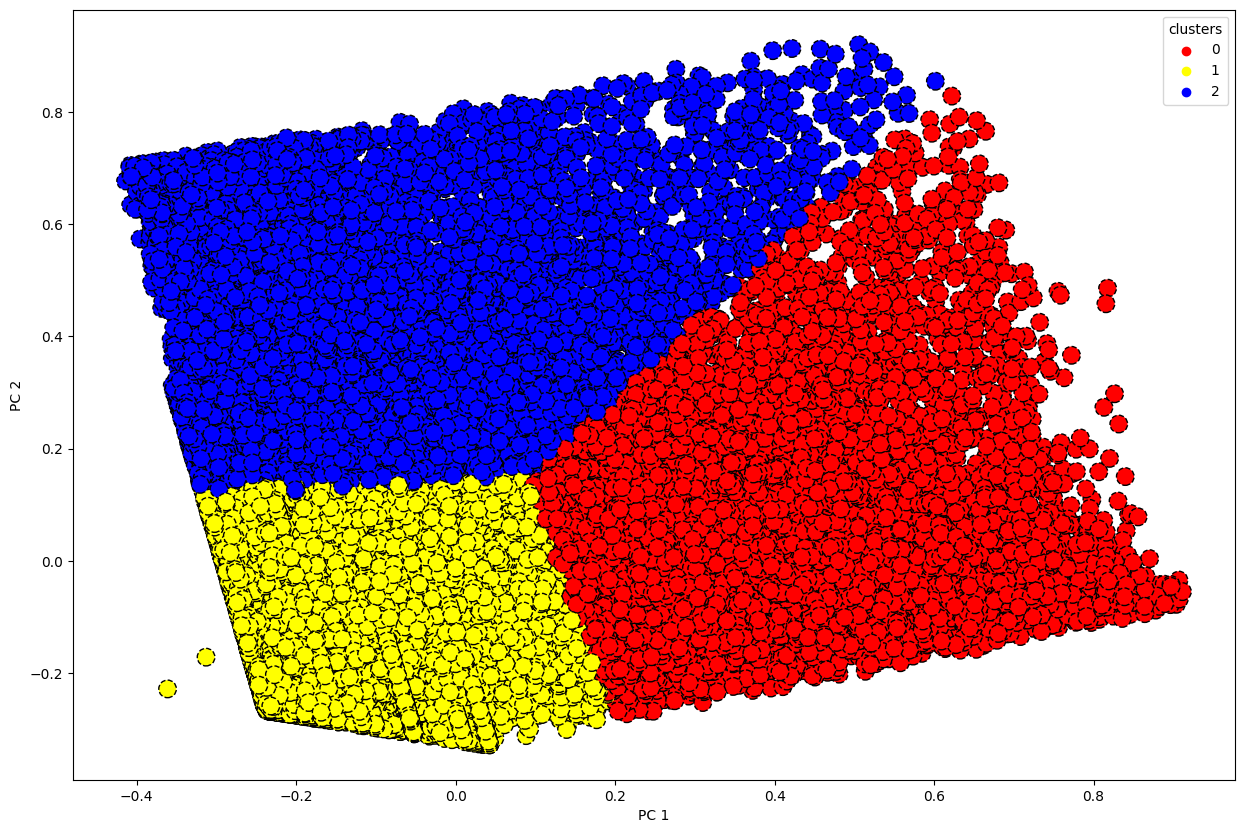

In [ ]:
data_pca['clusters'] = data['clusters'].values

fig, ax = plt.subplots(figsize = (15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['Red', 'yellow', 'Blue'],
    s=160,
    ax=ax)


In [ ]:
hasil = data.copy()

hasil.columns = ['recency', 'frequency', 'Monetary', 'clusters']
hasil= hasil.groupby('clusters').agg(['mean', 'median'])
hasil

recency        frequency              Monetary            
                mean median      mean    median        mean      median
clusters                                                               
0          92.686724   53.0  0.676210  0.625000  307.574733  291.764706
1          79.923496   65.0  0.294524  0.217391   62.462315   51.882353
2         383.281359  362.0  0.205535  0.142857  113.829101   86.225148

## Segmentasi

- 0 = High-Value Passengers (Important)

Memiliki nilai recency, frequency, dan monetary yang tinggi, menunjukkan bahwa penumpang dalam klaster ini adalah penumpang aktif dengan kontribusi pendapatan yang signifikan bagi maskapai.
- 1 = Mid-Value Passengers (Potensial).

Menunjukkan penumpang dengan tingkat aktivitas dan kontribusi pendapatan rendah
- 2 = Low-Value Passengers (Low - Potensial).

Menunjukkan penumpang yang jarang terbang dengan kontribusi pendapatan yang lebih sedang

## Rekomendasi Bisnis
### Cluster 0
- Menawarkan program loyalitas eksklusif kepada penumpang dalam klaster ini dengan memberikan keuntungan tambahan seperti prioritas boarding.
- Memberikan penawaran diskon atau promosi khusus kepada penumpang dalam klaster ini, dengan mengirimkan mereka kode promo melalui email atau aplikasi mobile untuk mendorong mereka untuk melakukan lebih banyak penerbangan atau memesan tiket lebih awal.

### Cluster 1:

- Mengajak penumpang dalam cluster ini untuk bergabung dengan program kesetiaan yang memberikan insentif, seperti poin reward atau diskon khusus untuk setiap penerbangan berikutnya untuk mendorong mereka melakukan penerbangan lebih sering dan memperoleh manfaat ekstra.
- Menawarkan paket perjalanan yang menggabungkan tiket pesawat dengan akomodasi atau layanan tambahan seperti hotel dengan harga spesial, untuk mendorong mereka melakukan penerbangan lebih sering dan memperoleh manfaat ekstra.


### Cluster 2:

- Menawarkan promosi menarik, seperti diskon khusus atau penawaran spesial, diberikan promo berupa cash back atau voucher yang menarik sehingga mereka dapat kembali untuk melakukan transaksi. Hal ini karena biaya untuk mempertahankan customer 5 - 25 kali lebih murah dibandingkan untuk mencari customer baru.
- Memberikan fleksibilitas lebih dalam pembayaran, misalnya dengan tarif yang lebih murah atau di-refund.